# Model 6 - Unconformity

An unconformity cutting an anticline structure. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = path_to_data + "model6_orientations.csv",
                        path_i = path_to_data + "model6_surface_points.csv") 

Active grids: ['regular']


In [3]:
geo_data.get_data()

X    Y    Z     X_r     Y_r      Z_r surface  \
surface_points 0      0  200  400  0.2501  0.3501  0.42485   rock1   
               1      0  500  400  0.2501  0.5001  0.42485   rock1   
               2      0  800  400  0.2501  0.6501  0.42485   rock1   
               3    100  200  500  0.3001  0.3501  0.47485   rock1   
               4    100  500  500  0.3001  0.5001  0.47485   rock1   
               5    100  800  500  0.3001  0.6501  0.47485   rock1   
               6    200  200  600  0.3501  0.3501  0.52485   rock1   
               7    200  500  600  0.3501  0.5001  0.52485   rock1   
               8    200  800  600  0.3501  0.6501  0.52485   rock1   
               9    800  200  600  0.6501  0.3501  0.52485   rock1   
               10   800  500  600  0.6501  0.5001  0.52485   rock1   
               11   800  800  600  0.6501  0.6501  0.52485   rock1   
               12   900  200  500  0.7001  0.3501  0.47485   rock1   
               13   900  500  500  0.7001  0.5001  0.47485   rock1   
               14   900  800  500  0.7001  0.6501  0.47485   rock1   
               15  1000  200  400  0.7501  0.3501  0.42485   rock1   
               16  1000  500  400  0.7501  0.5001  0.42485   rock1   
               17  1000  800  400  0.7501  0.6501  0.42485   rock1   
               18     0  200  600  0.2501  0.3501  0.52485   rock2   
               19     0  500  600  0.2501  0.5001  0.52485   rock2   
               20     0  800  600  0.2501  0.6501  0.52485   rock2   
               21  1000  200  600  0.7501  0.3501  0.52485   rock2   
               22  1000  500  600  0.7501  0.5001  0.52485   rock2   
               23  1000  800  600  0.7501  0.6501  0.52485   rock2   
               24   100  200  700  0.3001  0.3501  0.57485   rock2   
               25   100  500  700  0.3001  0.5001  0.57485   rock2   
               26   100  800  700  0.3001  0.6501  0.57485   rock2   
               27   900  200  700  0.7001  0.3501  0.57485   rock2   
               28   900  500  700  0.7001  0.5001  0.57485   rock2   
               29   900  800  700  0.7001  0.6501  0.57485   rock2   
               30   200  200  701  0.3501  0.3501  0.57535   rock3   
               31   200  500  701  0.3501  0.5001  0.57535   rock3   
               32   200  800  701  0.3501  0.6501  0.57535   rock3   
               33   500  200  701  0.5001  0.3501  0.57535   rock3   
               34   500  500  701  0.5001  0.5001  0.57535   rock3   
               35   500  800  701  0.5001  0.6501  0.57535   rock3   
               36   800  200  701  0.6501  0.3501  0.57535   rock3   
               37   800  500  701  0.6501  0.5001  0.57535   rock3   
               38   800  800  701  0.6501  0.6501  0.57535   rock3   
orientations   2    100  500  500  0.3001  0.5001  0.47485   rock1   
               3    900  500  500  0.7001  0.5001  0.47485   rock1   
               0    100  500  700  0.3001  0.5001  0.57485   rock2   
               1    900  500  700  0.7001  0.5001  0.57485   rock2   
               4    500  500  701  0.5001  0.5001  0.57535   rock3   

                           series  id  order_series        smooth  \
surface_points 0   Default series   1             1  1.000000e-08   
               1   Default series   1             1  1.000000e-08   
               2   Default series   1             1  1.000000e-08   
               3   Default series   1             1  1.000000e-08   
               4   Default series   1             1  1.000000e-08   
               5   Default series   1             1  1.000000e-08   
               6   Default series   1             1  1.000000e-08   
               7   Default series   1             1  1.000000e-08   
               8   Default series   1             1  1.000000e-08   
               9   Default series   1             1  1.000000e-08   
               10  Default series   1             1  1.000000e-08   
               11  Default series   1      

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series1": ('rock3'),
                                     "Strat_Series2": ('rock2','rock1'),
                                     "Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
2,rock3,Strat_Series1,1,False,#ffbe00,1
0,rock1,Strat_Series2,1,False,#015482,2
1,rock2,Strat_Series2,2,False,#9f0052,3
3,basement,Basement_Series,1,True,#728f02,4


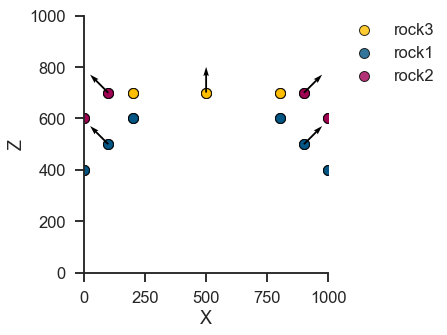

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [7]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

In [8]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

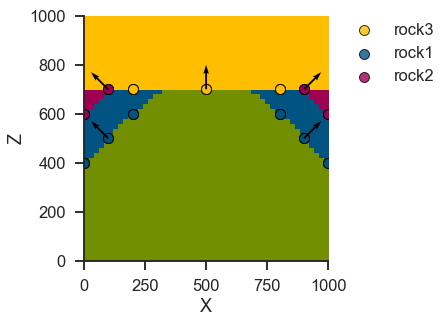

In [11]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=True)

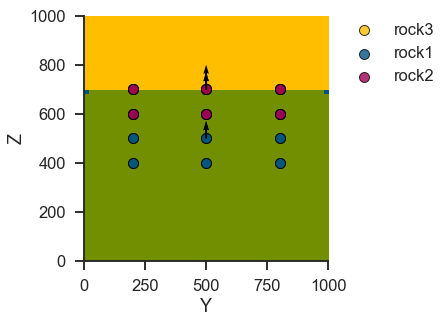

In [13]:
%matplotlib inline
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                     direction='x', show_data=True)